In [1]:
import pandas as pd
import numpy as np
import statistic_lib as st
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def scale(df):
    titles = df.columns[1:]
    for col in titles:
        arr = df[col]
        X_std = st.std(arr)
        mean_X = st.mean(arr)
        if X_std != 0:
            scaled_X = (arr - mean_X) / X_std
        df[col] = scaled_X
    return df

The courses that are similar are :
Astronomy and Defense Against the Dark Arts


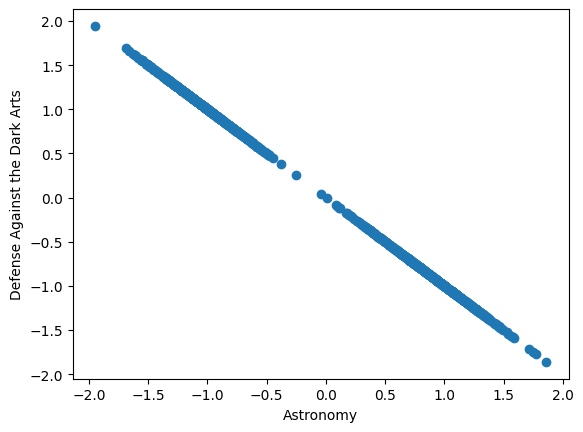

In [3]:
df = pd.read_csv('../datasets/dataset_train.csv')

df_numeric = scale(df.select_dtypes(include=['number']).drop(columns=['Index']).dropna())

corr_course = []

for col_a in df_numeric:
    A = df_numeric[col_a]
    for col_b in df_numeric:
        if col_a != col_b:
            B = df_numeric[col_b]
            X = df_numeric[col_a] - st.mean(df_numeric[col_a])
            Y = df_numeric[col_b] - st.mean(df_numeric[col_b])
            cov = np.dot(X, Y) / len(df_numeric[col_a])
            corr = cov / ((st.std(df_numeric[col_a]) * st.std(df_numeric[col_b])))
            if abs(corr) >= 0.98:
                if col_a not in corr_course:
                    corr_course.append(col_a)
                    corr_course.append(col_b)
print('The courses that are similar are :')
print(corr_course[0], end=' and ')
print(corr_course[1])

plt.scatter(df_numeric[corr_course[0]], df_numeric[corr_course[1]])
plt.xlabel(corr_course[0])
plt.ylabel(corr_course[1])

plt.show()